In [133]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import scipy.stats as st
data_df = pd.read_csv('LargeSample.csv')
data_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
data_df[["City",'State','Country','0']] = data_df['Address'].str.split(',',expand=True)
data_df[["Number",'City']] = data_df['City'].str.split(' ',expand=True, n=1)
data_df = data_df[data_df['State'].str.len() < 4].reset_index()
data_df = data_df[data_df['Ratings count'] < 15000].reset_index()
del data_df['level_0']
del data_df['index']
del data_df['0']
del data_df['Number']
del data_df['Address']
data_df

,Place ID,Name,Latitude,Longitude,Rating,Ratings count,Price range,City,State,Country
0,ChIJZQ6BEXZe14AR6olrRzitFFc,Subway,32.849288,-115.569706,4.2,72,1,Imperial,CA,USA
1,ChIJG3vjvDda14ARQQpdsyPpiZM,Subway,32.962409,-115.545849,3.9,24,1,Brawley,CA,USA
2,ChIJ65WooQpe14ARe5yAyhIps28,Maranatha Steakhouse,32.841779,-115.568291,4.5,310,2,Imperial,CA,USA
3,ChIJP646YhRa14ARqb8dCyn0i5s,Pizza Hut,32.978951,-115.547330,4.2,257,1,Brawley,CA,USA
4,ChIJH3Qkemla14ARaPGcgMIywEM,Little Caesars Pizza,32.978710,-115.537636,4.4,193,1,Brawley,CA,USA
...,...,...,...,...,...,...,...,...,...,...
18930,ChIJJXZCTaqo1oYRNmy84A-5lc0,Restaurant La Bocanita,31.475669,-111.000913,4.3,457,2,Rio Rico,AZ,USA
18931,ChIJIySXp6-t1oYRtZjbmxiHX80,Subway,31.364264,-110.941297,4.3,139,1,Nogales,AZ,USA
18932,ChIJr1R0p6-t1oYRcBIFc2WNaNM,Little Caesars Pizza,31.364300,-110.941260,3.8,218,1,Nogales,AZ,USA
18933,ChIJJY8bXC2s1oYR5Hz3sDrizpc,Gariola Coffee House,31.366275,-110.934318,4.7,99,2,Nogales,AZ,USA


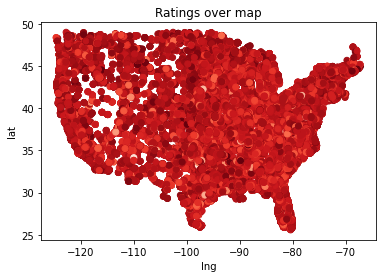

In [2]:
plt.title('Ratings over map')
plt.xlabel('lng')
plt.ylabel('lat')
plt.scatter(data_df['Longitude'], data_df['Latitude'], c=data_df["Rating"], cmap='Reds')

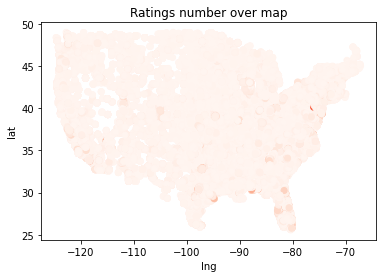

In [3]:
plt.title('Ratings number over map')
plt.xlabel('lng')
plt.ylabel('lat')
plt.scatter(data_df['Longitude'], data_df['Latitude'], c=data_df["Ratings count"], cmap='Reds')

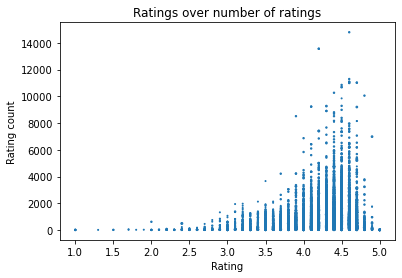

In [32]:
plt.title('Ratings over number of ratings')
plt.xlabel('Rating')
plt.ylabel('Rating count')
plt.scatter(data_df['Rating'], data_df['Ratings count'], s=data_df["Price range"], cmap='Reds')

In [134]:
state_df = data_df.groupby('State').agg({'Rating':'mean',"Ratings count":"mean","Price range":"mean"}).reset_index()
state_df.sort_values(by='Rating', inplace=True, ignore_index=True)
data_state_mean = pd.merge(data_df, state_df, on="State", how="outer")
data_state_mean 

,Place ID,Name,Latitude,Longitude,Rating_x,Ratings count_x,Price range_x,City,State,Country,Rating_y,Ratings count_y,Price range_y
0,ChIJZQ6BEXZe14AR6olrRzitFFc,Subway,32.849288,-115.569706,4.2,72,1,Imperial,CA,USA,4.14904,672.144914,1.606526
1,ChIJG3vjvDda14ARQQpdsyPpiZM,Subway,32.962409,-115.545849,3.9,24,1,Brawley,CA,USA,4.14904,672.144914,1.606526
2,ChIJ65WooQpe14ARe5yAyhIps28,Maranatha Steakhouse,32.841779,-115.568291,4.5,310,2,Imperial,CA,USA,4.14904,672.144914,1.606526
3,ChIJP646YhRa14ARqb8dCyn0i5s,Pizza Hut,32.978951,-115.547330,4.2,257,1,Brawley,CA,USA,4.14904,672.144914,1.606526
4,ChIJH3Qkemla14ARaPGcgMIywEM,Little Caesars Pizza,32.978710,-115.537636,4.4,193,1,Brawley,CA,USA,4.14904,672.144914,1.606526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18930,ChIJK8BXfbi3t4kR1dPf6WP7Bgc,Shake Shack,38.906357,-77.041897,4.2,2345,2,Washington,DC,USA,4.33750,4254.250000,2.250000
18931,ChIJk58zcbq3t4kR9VDFZdcB5uE,Founding Farmers DC,38.900285,-77.044527,4.4,10271,2,Washington,DC,USA,4.33750,4254.250000,2.250000
18932,ChIJ0zjVx5e3t4kRPiQqmswuh9c,The Hamilton,38.897655,-77.032274,4.5,5672,2,Washington,DC,USA,4.33750,4254.250000,2.250000
18933,ChIJAb66zdy3t4kRmADgbA-AMQo,Local 16,38.916840,-77.037108,4.1,575,2,Washington,DC,USA,4.33750,4254.250000,2.250000


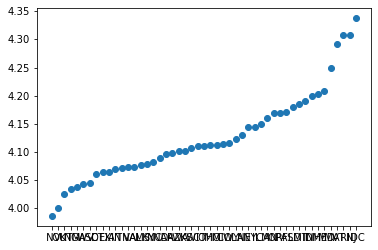

In [25]:
plt.scatter(state_df['State'], state_df['Rating'])

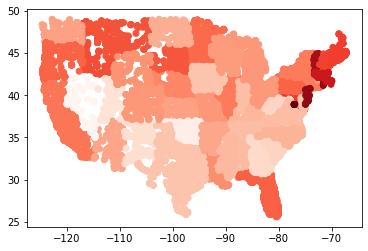

In [30]:
# Average rating per state
plt.scatter(data_state_mean ['Longitude'], data_state_mean ['Latitude'], c=data_state_mean ["Rating_y"], cmap='Reds')

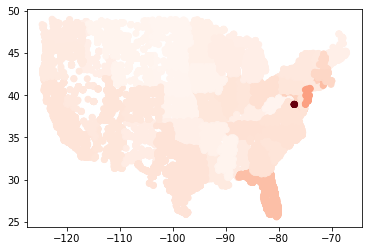

In [31]:
# Average number of ratings per state
plt.scatter(data_state_mean ['Longitude'], data_state_mean ['Latitude'], c=data_state_mean ["Ratings count_y"], cmap='Reds')

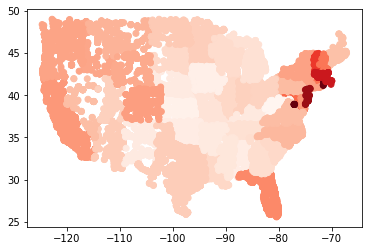

In [135]:
# Average price per state
plt.scatter(data_state_mean ['Longitude'], data_state_mean ['Latitude'], c=data_state_mean ["Price range_y"], cmap='Reds')

(0.3712414433816412, 0.07408809497138542)
y = 0.0x + 4.02


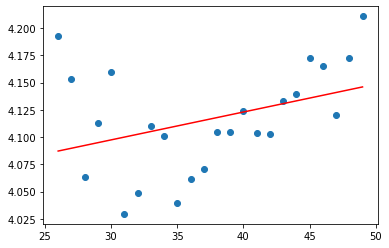

In [137]:
# Ratings per latitude - South to North progression of ratings
roundup_df = data_df
roundup_df['Longitude'] = roundup_df['Longitude'].round(decimals=1)
roundup_df['Latitude'] = roundup_df['Latitude'].round(decimals=0)
roundup_df = roundup_df.groupby('Latitude').agg({'Rating':'mean',"Ratings count":"mean"}).reset_index()
plt.scatter(roundup_df['Latitude'], roundup_df['Rating'])
print(st.pearsonr(roundup_df['Rating'], roundup_df['Latitude']))
(slope, intercept, rvalue, pvalue, stderr) = linregress(roundup_df['Latitude'], roundup_df['Rating'])
regress_values = roundup_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(roundup_df['Latitude'],regress_values,"r-")
print(line_eq)

(0.4984131591136486, 6.173383260172694e-22)
y = 0.01x + 4.02


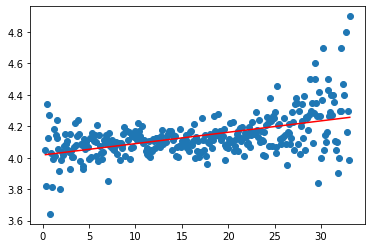

In [113]:
# Dallas Texas 32.7767° N, 96.7970° W 
# Oklahoma City 35.4676° N, 97.5164° W
# Ratings on distance from Texas
texas_df = data_df
texas_df['Distance'] = np.sqrt(((texas_df['Longitude']+99)**2) + ((texas_df['Latitude']-35.9)**2))
texas_df['Distance'] = texas_df['Distance'].round(decimals=1)
texas_df.sort_values(by='Distance', inplace=True, ignore_index=True)
texas_df = texas_df.groupby('Distance').agg({'Rating':'mean',"Ratings count":"mean"}).reset_index()
plt.scatter(texas_df['Distance'], texas_df['Rating'])
print(st.pearsonr(texas_df['Rating'], texas_df['Distance']))
(slope, intercept, rvalue, pvalue, stderr) = linregress(texas_df['Distance'], texas_df['Rating'])
regress_values = texas_df['Distance'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(texas_df['Distance'],regress_values,"r-")
print(line_eq)

(0.5819941721312972, 2.572403584852766e-29)
y = 23.16x + 138.11


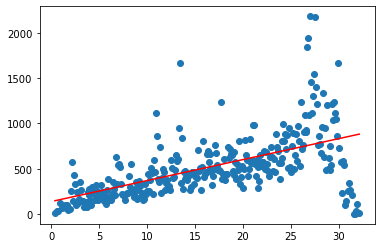

In [131]:
# Grand Forks North Dakota 47.9253° N, 97.0329° W
# Number of ratings on distance from North Dacota
texas_df = data_df
texas_df['Distance'] = np.sqrt(((texas_df['Longitude']+99)**2) + ((texas_df['Latitude']-49)**2))
texas_df['Distance'] = texas_df['Distance'].round(decimals=1)
texas_df.sort_values(by='Distance', inplace=True, ignore_index=True)
texas_df = texas_df.groupby('Distance').agg({'Rating':'mean',"Ratings count":"mean"}).reset_index()
plt.scatter(texas_df['Distance'], texas_df['Ratings count'])
print(st.pearsonr(texas_df['Ratings count'], texas_df['Distance']))
(slope, intercept, rvalue, pvalue, stderr) = linregress(texas_df['Distance'], texas_df['Ratings count'])
regress_values = texas_df['Distance'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(texas_df['Distance'],regress_values,"r-")
print(line_eq)